## matplotlibを用いて住民税を計算する

## 住民税の計算方法
1. 合計所得金額－損失の繰越控除＝総所得金額
2. 総所得金額－所得控除額の合計＝課税所得額
3. 課税所得額×税率（10％）＝税額控除前の所得割額
4. 税額控除前の所得割額－税額控除の額＝税額控除後の所得割額
5. 税額控除後の所得割額＋均等割額＝住民税の額

参考
- <https://www.nta.go.jp/taxes/shiraberu/taxanswer/shotoku/1410.htm>
- <https://www.oag-tax.co.jp/asset-campus-oag/inhabitant-tax-845#2-5STEP3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

## 1. 総所得金額を計算する
- 損失の繰越控除は今回考慮しないものとする
- 年収が150万円~1500万円までを計算範囲とする

In [33]:
income_whole = np.arange(150, 1500, 50)

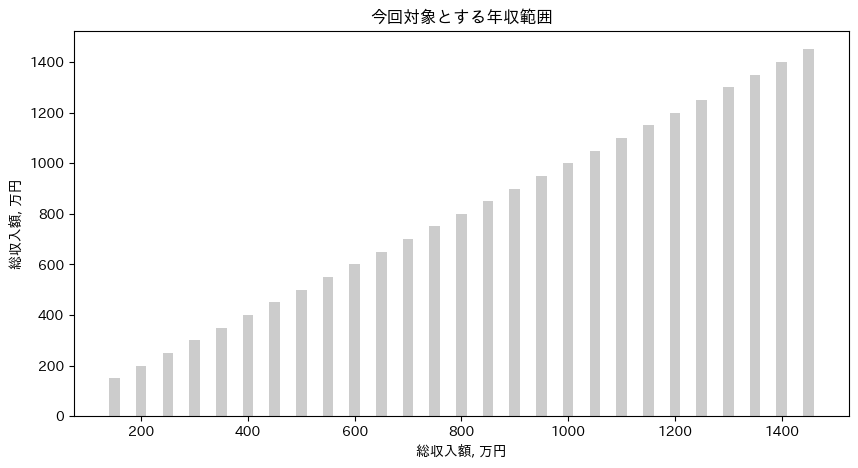

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('今回対象とする年収範囲')
ax.bar(income_whole, income_whole, width=20, alpha=0.4, color='gray')

ax.set_xlabel('総収入額, 万円')
ax.set_ylabel('総収入額, 万円')
plt.show()

## 2. 課税所得額を計算する

In [39]:
def 給与所得控除計算(income_whole: int):
    '''
        (参考)：https://www.nta.go.jp/taxes/shiraberu/taxanswer/shotoku/1410.htm
        *関数名を英語もしくはローマ字にすると可読性が悪くなると思いあえて感じにした
    '''
    
    if income_whole <= 162.5:
        income_deduction = 55
    elif income_whole <= 180:
        income_deduction = income_whole * 0.40 - 10
    elif income_whole <= 360:
        income_deduction = income_whole * 0.30 + 8
    elif income_whole <= 660:
        income_deduction = income_whole * 0.20 + 44
    elif income_whole <= 850:
        income_deduction = income_whole * 0.10 + 110
    else:
        income_deduction = 195
    
    return income_deduction

def 住民税計算(income_taxable: int):
    '''
        (参考)：https://biz.moneyforward.com/tax_return/basic/49732
    '''
    # 所得割の標準税率は10%
    resident_tax = income_taxable * 0.10
    
    # 均等割（年額）の5000円分を加算
    resident_tax += 0.5
    
    return resident_tax

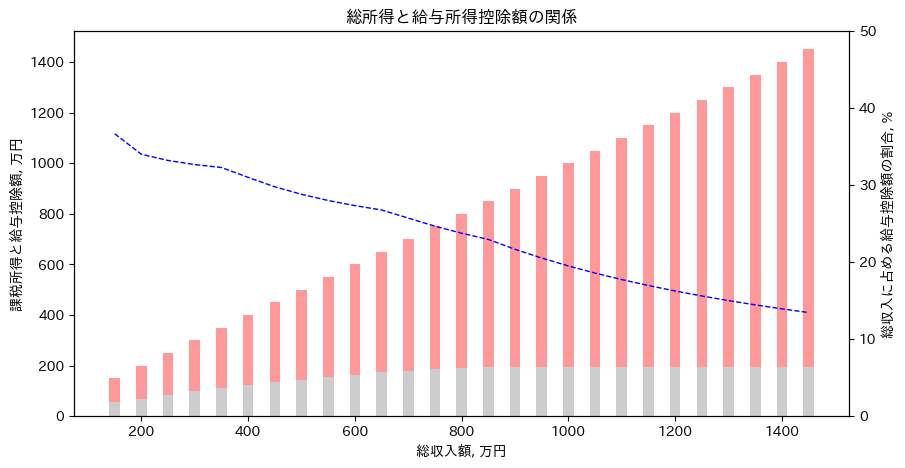

In [38]:
income_deduction = np.array([給与所得控除計算(i) for i in income_whole])
income_taxable = income_whole - income_deduction

income_deduction_rate = income_deduction / income_whole * 100

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('総所得と給与所得控除額の関係')
ax.bar(income_whole, income_deduction, width=20, alpha=0.4, color='gray')
ax.bar(income_whole, income_taxable, bottom=income_deduction, width=20, alpha=0.4, color='r')

ax2 = ax.twinx()

ax2.plot(income_whole, income_deduction_rate, 'b--', linewidth=1)

ax.set_xlabel('総収入額, 万円')
ax.set_ylabel('課税所得と給与控除額, 万円')
ax2.set_ylabel('総収入に占める給与控除額の割合, %')
ax2.set_ylim([0, 50])
plt.show()

# 3.税額控除前の所得割額を計算する
- 課税所得額×税率（10％）＝税額控除前の所得割額

In [43]:
resident_tax = np.array([住民税計算(i) for i in income_taxable])
resident_tax_rate = resident_tax / income_whole * 100

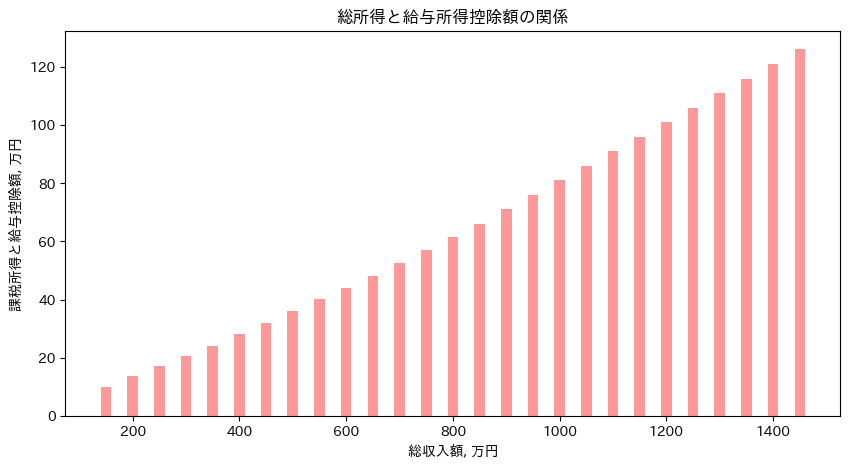

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('総所得と給与所得控除額の関係')
ax.bar(income_whole, resident_tax, width=20, alpha=0.4, color='r')
# ax2 = ax.twinx()
# ax2.plot(income_whole, resident_tax_rate, 'b--', linewidth=1)

ax.set_xlabel('総収入額, 万円')
ax.set_ylabel('課税所得と給与控除額, 万円')
# ax2.set_ylabel('総収入に占める給与控除額の割合, %')
# ax2.set_ylim([0, 50])
plt.show()

In [49]:
83354*12

1000248